In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\TESS_catalogue_revised.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_3456\3915017766.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\TESS_catalogue_revised.csv")


In [3]:
df.loc[1604]

Unnamed: 0.1                              2154
Unnamed: 0                                2154
TIC ID                           TIC 438118505
Teff                               3870.190000
logg                                  4.770000
Flare #                                      7
Observation time                    161.075697
Average flare duration                0.205367
Longest flare duration                0.548646
Shortest flare duration               0.083331
Average percentage increase    90992520.168841
Highest percentage increase   196572896.410212
Lowest percentage increase           74.115586
Name: 1604, dtype: object

In [42]:
flc = from_mast("TIC 438118505", mode="LC", mission="TESS")

0% (12/3408) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
0% (12/3408) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1% (17/3278) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1% (17/3278) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
2% (53/3450) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
2% (53/3450) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
9% (89/993) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
9% (89/993) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1% (12/993) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1% (12/993) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


In [43]:
flc = flc[5]

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

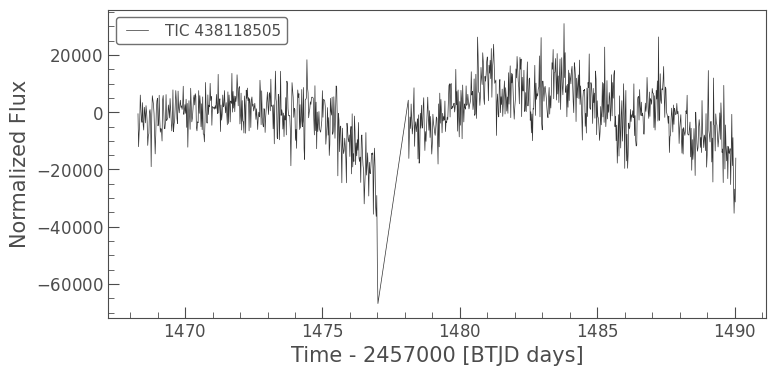

In [44]:
flc.plot()

In [45]:
flc = flc.detrend("savgol")

C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\astropy\utils\masked\core.py:865: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(*unmasked, **kwargs)
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\astropy\utils\masked\core.py:865: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(*unmasked, **kwargs)


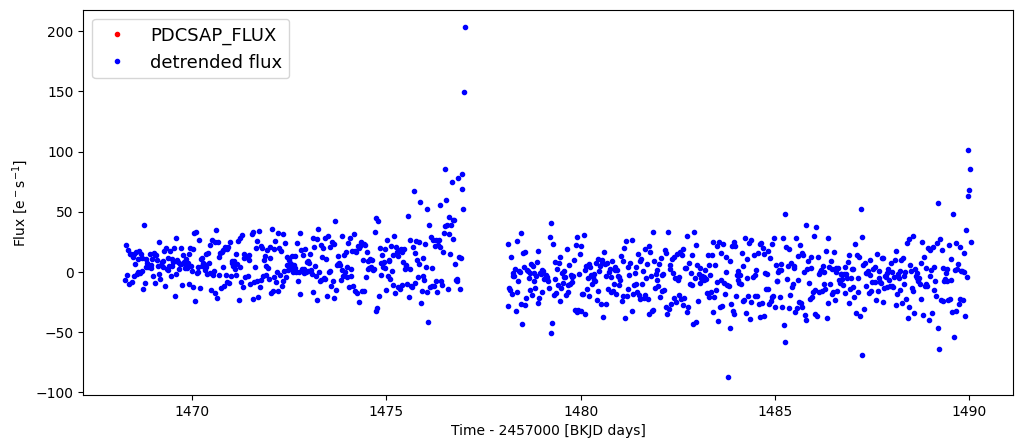

In [46]:
plt.figure(figsize=(12,5))

plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r.", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")

plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")

#plt.xlim(1380.9, 1381.5)
#plt.ylim(.95,1.25)

plt.legend(loc=2,fontsize=13);

In [48]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur


In [47]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 0 candidate(s) in the (0,417) gap.
Found 0 candidate(s) in the (417,987) gap.
